In [1]:
%pip install sklearn
%pip install scikit-learn
%pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import json

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aimar\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aimar\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aimar\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# IN DOMAIN EXPERIMENTS

## ENGLISH
We get the predictions made by the model for the english language and then we use the predictions together with the gold standar to get the accuracy.

In [55]:
lang = "English"
ruta_archivo = f"output/test_{lang}_predictions.jsonl"

all_tags = []
all_predictions = []

# read de jsonl file and process it
with open(ruta_archivo, "r", encoding="utf-8") as archivo:
    contenido = archivo.read()
    contenido = "[" + contenido.strip().replace("}\n{", "},{") + "]"
    elementos = json.loads(contenido)
    #print(len(elementos[0]))

# get the tag and prediction of each instance and concatenate them
for elemento in elementos:
    all_tags.extend(elemento.get("tags", []))
    all_predictions.extend(elemento.get("prediction", []))


**Accuracy score of the English model**

In [56]:
accuracy = accuracy_score(all_tags, all_predictions)
accuracy

0.8678194607268465

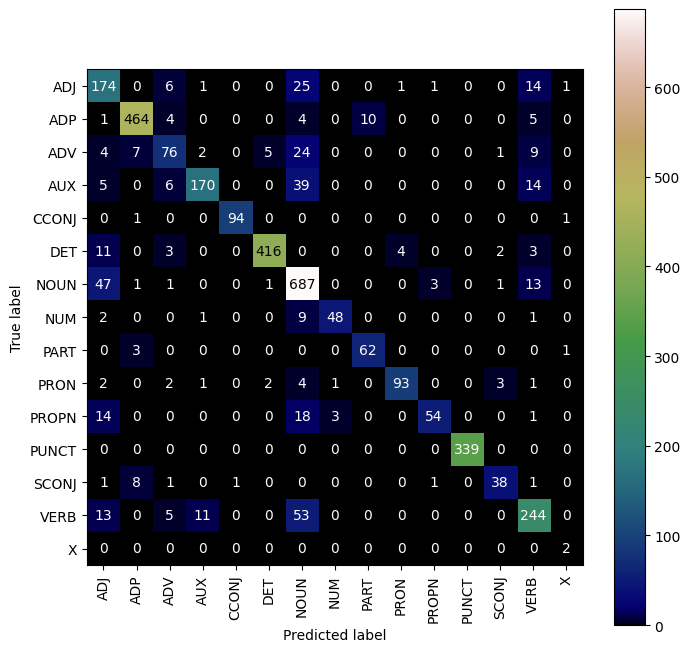

In [57]:
#create the confusion matrix
tags_set = sorted(set(all_predictions))
cm=confusion_matrix(all_tags, all_predictions, labels=tags_set)
cm

#show the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust width and height as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tags_set)
disp.plot(cmap="gist_earth", ax=ax, xticks_rotation="vertical")

plt.show()

The confusion matrix shows that there is high correlation between the actual tags and the model's predictions. Overall, the number of errors is low in all tags and the accuracy score is high (0.96). However, the model does not predict correctly the PART (Particle) tag, and it confuses it with the ADP (Adposition) tag. Both tags have in common that the usually appear as elements that don't have lexical meaning but are crucial for the sentence meaning, and common words in English like 'to' could be PART or ADP depending on the context. Also, PART is the less common tag in the training corpus. All of this explains why the model fails with this tag.

## SPANISH

In [58]:
lang = "Spanish"
ruta_archivo = f"output/test_{lang}_predictions.jsonl"

all_tags = []
all_predictions = []

# read de jsonl file and process it
with open(ruta_archivo, "r", encoding="utf-8") as archivo:
    contenido = archivo.read()
    contenido = "[" + contenido.strip().replace("}\n{", "},{") + "]"
    elementos = json.loads(contenido)
    #print(len(elementos[0]))

# get the tag and prediction of each instance and concatenate them
for elemento in elementos:
    all_tags.extend(elemento.get("tags", []))
    all_predictions.extend(elemento.get("prediction", []))


In [59]:
accuracy = accuracy_score(all_tags, all_predictions)
accuracy

0.9238956509232125

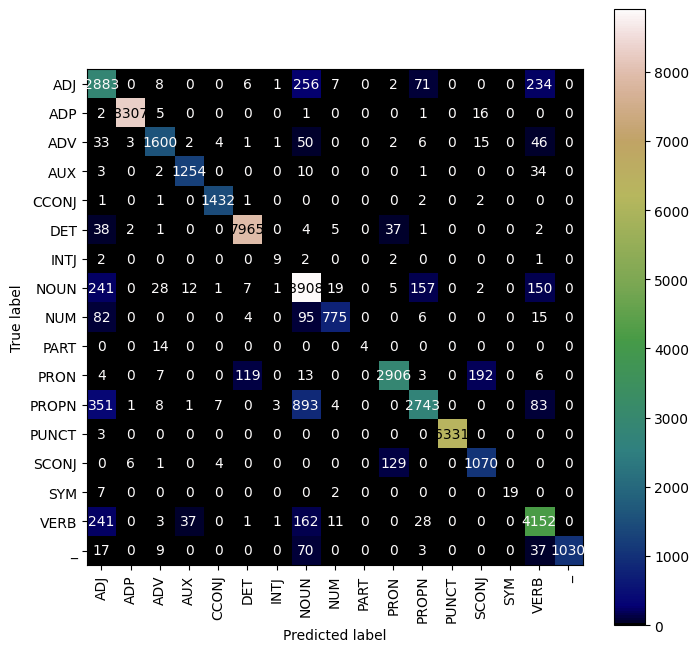

In [60]:
accuracy
#create the confusion matrix
tags_set = sorted(set(all_predictions))
cm = confusion_matrix(all_tags, all_predictions, labels=tags_set)
cm

#show the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust width and height as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tags_set)
disp.plot(cmap="gist_earth", ax=ax, xticks_rotation="vertical")

plt.show()

As in English, the confusion matrix for Spanish shows that there is also high correlation between the predictions and the actual clases in Spanish. However, in Spanish, the model makes more errors and it is reflected both in the matrix and in the slightly lower accuracy score (0.88). In this case, it is worth mentioning that the tags that the model confuses the most are the NOUN and PROPN. As the NOUN and PROPN are similar between them, this error is understandable. Also, the model makes a remarkable number of errors with tags like VERB or PUNCT.

## OUT-OF-DOMAIN RESULTS

# ENGLISH

In [61]:
lang = "English"
ruta_archivo = f"output/od_{lang}_predictions.jsonl"

all_tags = []
all_predictions = []

# read de jsonl file and process it
with open(ruta_archivo, "r", encoding="utf-8") as archivo:
    contenido = archivo.read()
    contenido = "[" + contenido.strip().replace("}\n{", "},{") + "]"
    elementos = json.loads(contenido)
    #print(len(elementos[0]))

# get the tag and prediction of each instance and concatenate them
for elemento in elementos:
    if len(elemento.get("tags", [])) != len(elemento.get("prediction", [])):
        print(elemento.get("sentence"))
    all_tags.extend(elemento.get("tags", []))
    all_predictions.extend(elemento.get("prediction", []))

In [62]:
accuracy = accuracy_score(all_tags, all_predictions)
accuracy

0.5617824644952802

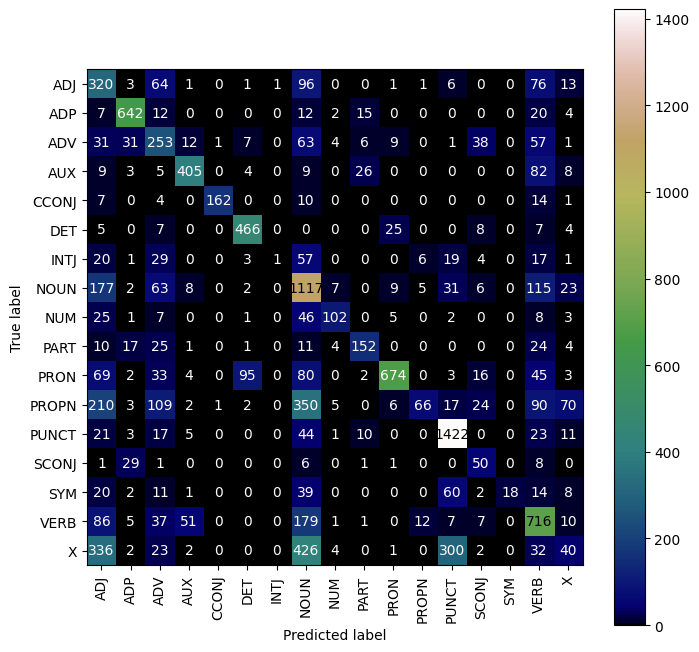

In [63]:
#create the confusion matrix
tags_set = sorted(set(all_tags))
cm = confusion_matrix(all_tags, all_predictions, labels=tags_set)
cm

#show the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust width and height as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tags_set)
disp.plot(cmap="gist_earth", ax=ax, xticks_rotation="vertical")

plt.show()

# Spanish

In [64]:
lang = "Spanish"
ruta_archivo = f"output/od_{lang}_predictions.jsonl"

all_tags = []
all_predictions = []

# read de jsonl file and process it
with open(ruta_archivo, "r", encoding="utf-8") as archivo:
    contenido = archivo.read()
    contenido = "[" + contenido.strip().replace("}\n{", "},{") + "]"
    elementos = json.loads(contenido)
    #print(len(elementos[0]))

# get the tag and prediction of each instance and concatenate them
for elemento in elementos:
    if len(elemento.get("tags", [])) != len(elemento.get("prediction", [])):
        print(elemento.get("sentence"))
    all_tags.extend(elemento.get("tags", []))
    all_predictions.extend(elemento.get("prediction", []))

In [65]:
accuracy = accuracy_score(all_tags, all_predictions)
accuracy

0.640244772309194

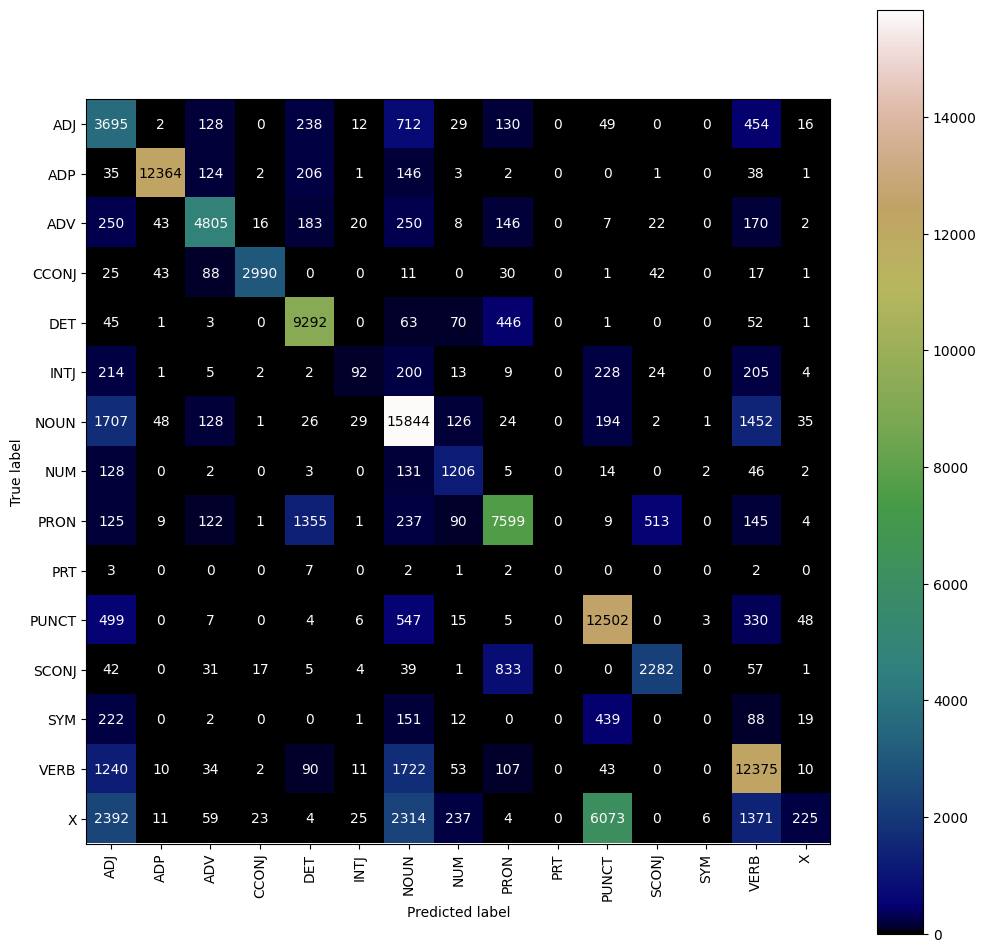

In [67]:
#create the confusion matrix
tags_set = sorted(set(all_tags))
cm = confusion_matrix(all_tags, all_predictions, labels=tags_set)
cm

#show the plot
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust width and height as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tags_set)
disp.plot(cmap="gist_earth", ax=ax, xticks_rotation="vertical")

plt.show()